In [13]:
#Importacion de librerias
import re
import csv
import matplotlib.pyplot as plt


In [14]:
with open ('pubmed_heliconius_set.txt',"r", encoding='utf-8-sig') as f:
    datos = f.read()
    

In [15]:
datos = re.sub(r'\n\s{6}', ' ', datos)
dat= re.findall (r"\,\s[A-Z]+[A-z]{2,11}\.\s", datos)
print(dat)


[', Inc.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', France.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', Germany.\n', ', USA.\n', ', Germany.\n', ', Colombia.\n', ', Ecuador.\n', ', Ecuador.\n', ', Ecuador.\n', ', France.\n', ', USA. ', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', USA.\n', ', Ecuador.\n', ', Panama.\n', ', USA.\n', ', Panama.\n', ', USA.\n', ', USA.\n', ', Colombia.\n', ', USA.\n', ', USA.\n', ', Univ. ', ', Brazil.\n', ', Univ. ', ', Univ. ', ', Brazil. ', ', USA.\n', ', USA.\n', ', USA.\n', ', USA. ', ', USA.\n', ', USA. ', ', USA. ', ', Australia. ', ', USA. ', ', USA. ', ', USA.\n', ', USA. ', ', USA.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', Brazil.\n', ', USA. ', ', France.\n', ', USA.\n', ', Brasil.\n',

In [22]:
unique_dat = list(set(dat))
unique_dat.sort()


In [17]:
zip_coordinates = {}
with open('coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

In [19]:
for z in unique_dat:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

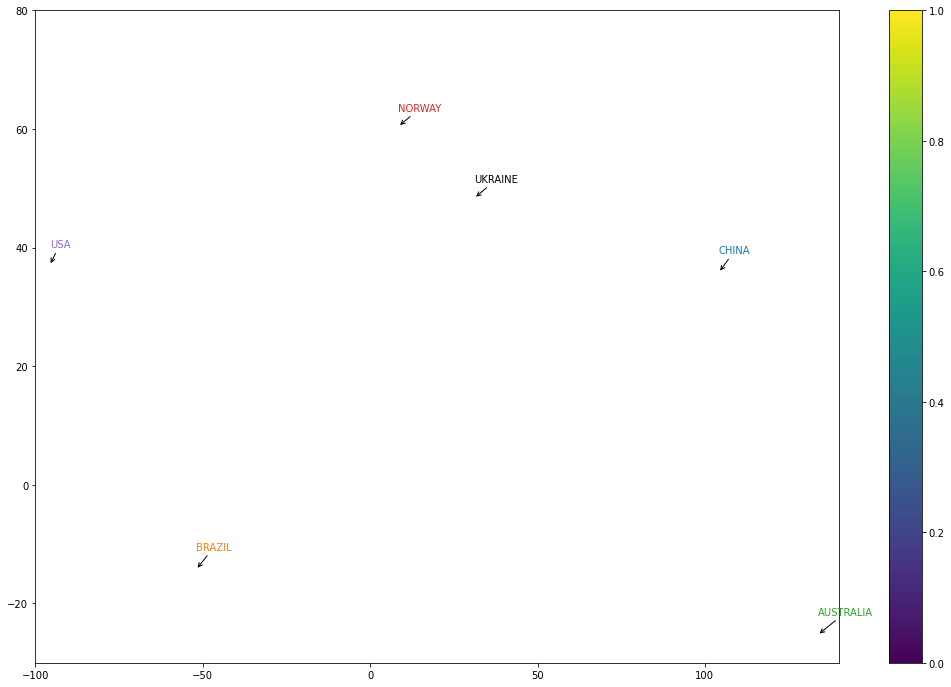

In [36]:
#Grafica 
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-100,140)
plt.ylim(-30, 80)

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard,color = 'tab:purple')
plt.annotate('UKRAINE', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard, color = 'tab:orange')
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard, color = 'tab:blue')
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard, color = 'tab:green')
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard, color = 'tab:red')

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()